In [164]:
import pickle
import numpy as np
prtest = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb'))
ftest = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb'))
ft = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb'))
prt = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb'))
nt, yt, xt = prtest.shape
n, y, x = prt.shape


In [165]:
# normalised mean square error - normalise, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot




In [146]:
prtest

array([[[0.00000000e+00, 2.45354659e-04, 2.53528876e-03, ...,
         4.52502207e-04, 9.61154962e-05, 0.00000000e+00],
        [0.00000000e+00, 2.09449603e-04, 2.15335096e-03, ...,
         6.81424087e-04, 1.17144758e-04, 0.00000000e+00],
        [0.00000000e+00, 1.40062061e-04, 1.10236989e-03, ...,
         9.08054211e-04, 1.31596900e-04, 0.00000000e+00],
        ...,
        [0.00000000e+00, 1.07649131e-04, 4.40054481e-04, ...,
         2.90424166e-04, 6.68755782e-05, 0.00000000e+00],
        [0.00000000e+00, 1.65307471e-04, 9.80647139e-04, ...,
         2.80464086e-04, 6.90980227e-05, 0.00000000e+00],
        [0.00000000e+00, 2.23317066e-04, 1.85780097e-03, ...,
         3.24333625e-04, 7.89021231e-05, 0.00000000e+00]],

       [[0.00000000e+00, 3.38513452e-05, 4.80887084e-05, ...,
         6.51158810e-05, 3.75387493e-05, 0.00000000e+00],
        [0.00000000e+00, 3.23037118e-05, 4.94384387e-05, ...,
         7.81473781e-05, 3.96616805e-05, 0.00000000e+00],
        [0.00000000e+00, 

In [166]:
# creating a lower resolution image to allow for greater no. of tests
prtqtr = list()
Y = int(y/2)
X = int(x/2)
f=0
g=0
for m in range(n):
    prtqtrdummy = np.array(np.zeros([Y,X]))
    for f in range(Y):
        for g in range(X):
            prtqtrdummy[f,g] = (1/4)*(prt[m,2*f,2*g]+prt[m,2*f+1,2*g]+prt[m,2*f,2*g+1]+prt[m,2*f+1,2*g+1])
    prtqtr.append(prtqtrdummy)
prt = np.array(prtqtr)
n, y, x = prt.shape




In [167]:
prtest = np.array(prtest)

In [168]:
prtest.shape

(200, 50, 50)

In [169]:
prtqtrtest = list()
Y = int(yt/2)
X = int(xt/2)
f=0
g=0
for m in range(nt):
    prtqtrdummytest = np.array(np.zeros([Y,X]))
    for f in range(Y):
        for g in range(X):
            prtqtrdummytest[f,g] = (1/4)*(prtest[m,2*f,2*g]+prtest[m,2*f+1,2*g]+prtest[m,2*f,2*g+1]+prtest[m,2*f+1,2*g+1])
    prtqtrtest.append(prtqtrdummytest)
prtest = np.array(prtqtrtest)
nt, yt, xt = prtest.shape

In [170]:
print(Xtest, Ytest)

25 25


In [171]:
#point cloud generation - coin flip method
ran = np.random.default_rng().uniform(size = (n,y,x))
flips = prt < ran
xpts1 = list()
ypts1 = list()
xypts1 = list()
for m in range(n):
    pts = np.argwhere(flips[m] == False)
    xypts1.append(pts)
    pts_y = pts[:,0]
    pts_x = pts[:,1]
    ypts1.append(pts_y)
    xpts1.append(pts_x) 

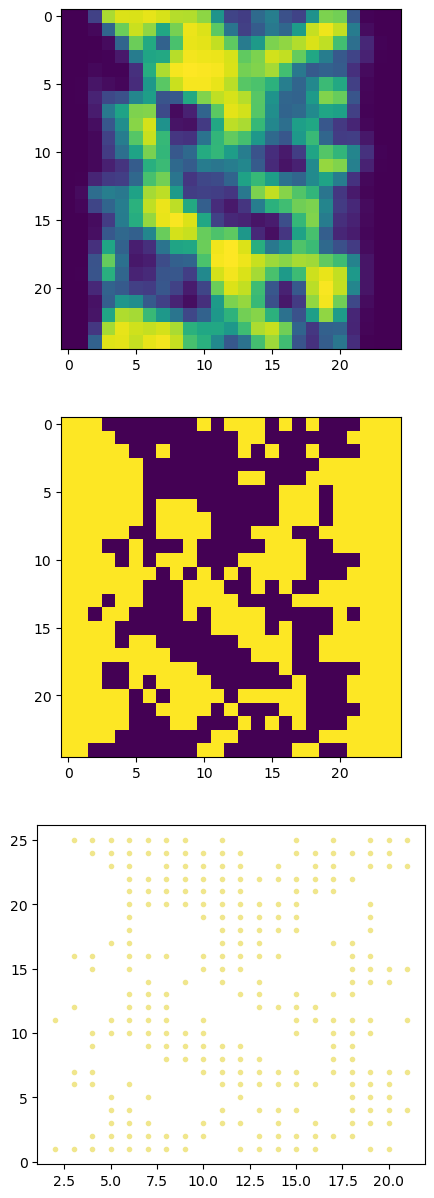

In [172]:
import matplotlib.pyplot as plt
inum = 19
train = prt[inum]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), gridspec_kw={'height_ratios': [1,1,1]})
ax1.imshow(train)
train = flips[inum]
ax2.imshow(train)
ax3.scatter(xpts1[inum],25-ypts1[inum],marker = '.', color = 'khaki')

In [173]:
ytest=25
xtest = 25
ntest = 200

In [174]:
#point cloud generation - coin flip method -- test
rantest = np.random.default_rng().uniform(size = (nt,yt,xt))
flipstest = prtest < rantest
xpts1test = list()
ypts1test = list()
xypts1test = list()
for m in range(nt):
    pts = np.argwhere(flipstest[m] == False)
    xypts1test.append(pts)
    pts_y = pts[:,0]
    pts_x = pts[:,1]
    ypts1test.append(pts_y)
    xpts1test.append(pts_x)  



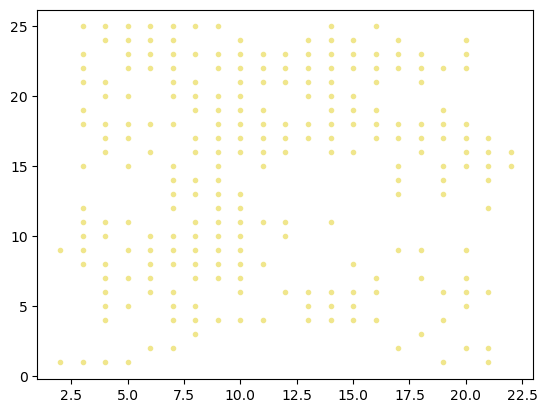

In [175]:
i = 0
plt.scatter(xpts1[i],25-ypts1[i],marker = '.', color = 'khaki')
plt.show()

In [176]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(n_jobs=-1)
PtCloudPers1 = VR.fit_transform(xypts1)
VR.plot(PtCloudPers1,0)


In [ ]:
#average of 10
PtCloudPersvect10 = list()
PtCloudPersvect10test = list()
for g in range(10):
    #train set
    randummy = np.random.default_rng().uniform(size = (n,y,x))
    flipsdummy = prt < randummy
    xypts1dummy = list()
    for m in range(n):
        ptsdummy = np.argwhere(flipsdummy[m] == False)
        xypts1dummy.append(ptsdummy)
    PtCloudPersdummy = VR.fit_transform(xypts1dummy)
    PtCloudPersvect10.append(PtCloudPersdummy)
    #test set
        randummy = np.random.default_rng().uniform(size = (nt,yt,xt))
        flipsdummy = prtest < randummy
        xypts1dummy = list()
    for m in range(n):
        ptsdummy = np.argwhere(flipsdummy[m] == False)
        xypts1dummy.append(ptsdummy)
    PtCloudPerstestdummy = VR.fit_transform(xypts1dummy)
    PtCloudPersvect10test.append(PtCloudPerstestdummy)

(253, 2) (199, 2)


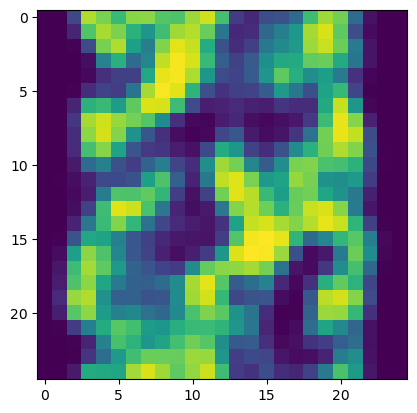

In [177]:
print(xypts1[1].shape, xypts1test[1].shape)
fig, ax = plt.subplots()
im = ax.imshow(prt[79])

In [178]:
PtCloudPers1test = VR.fit_transform(xypts1test)
VR.plot(PtCloudPers1test,0)

In [179]:
#point cloud generation - a measure on a square

msr = np.sum(np.sum(prt, axis=-1), axis=-1)
k = np.round(msr)

ypts2 = list()
xpts2 = list()
xypts2 = list()

for m in range(n):
    p0 = prt[m]/msr[m]     #probability matrix
    p_flat = p0.flatten()
    pts = np.random.default_rng().choice(x*y,int(k[m]),p=p_flat)
    pts_y = pts//y
    pts_x = pts%x
    pts_xy = np.transpose([pts_x,pts_y])
    ypts2.append(pts_y)
    xpts2.append(pts_x)
    xypts2.append(pts_xy)


In [180]:
ft[0]

0.4554189049891245

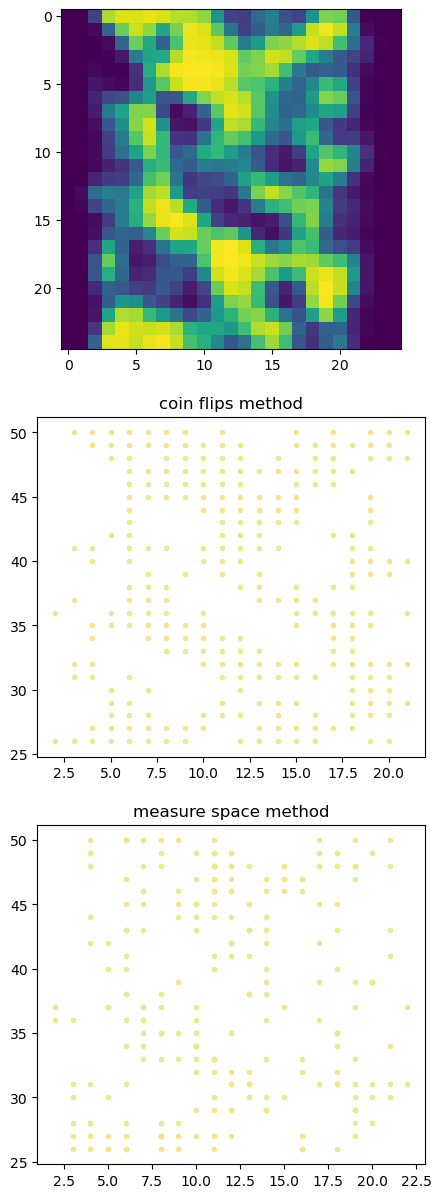

In [181]:
#comparing coin flips and msr space
i = 19
train = prt[i]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), gridspec_kw={'height_ratios': [1,1,1]})
ax1.imshow(train)
ax2.scatter(xpts1[i],50-ypts1[i],marker = '.', color = 'khaki')
ax2.set_title('coin flips method')
ax3.scatter(xpts2[i],50-ypts2[i],marker = '.', color = 'khaki')
ax3.set_title('measure space method')
plt.show()

In [182]:
#comparing coin flips and msr space - no. of points
flipsptscount = list()
for m in range(n):
    flipsptscount.append(xypts1[m].shape)
msrptscount = list()
for m in range(n):
    msrptscount.append(xypts2[m].shape)

flipsptscount = np.array(flipsptscount)
msrptscount = np.array(msrptscount)
ptsratio = flipsptscount / msrptscount
print(ptsratio.mean())

# note this is the comparison of no. of points counting multiplicities - and is, as expected, equal.

xypts2uniq = list()
msrptscountuniq = list()
for m in range(n):
    d = np.unique(xypts2[m])
    xypts2uniq.append(d)
    msrptscountuniq.append(d.shape)

msrptscountuniq = np.array(msrptscountuniq)
ptsratiouniq = flipsptscount / msrptscountuniq
print(ptsratiouniq.mean())
    


1.0010292952706967
4.748246666666667


In [183]:
# sum(p-q) vs flux flip
import numpy.polynomial.polynomial as npl
i = PtCloudPers1.shape[0]
pers1diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers1[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0[j] = diff_sumC

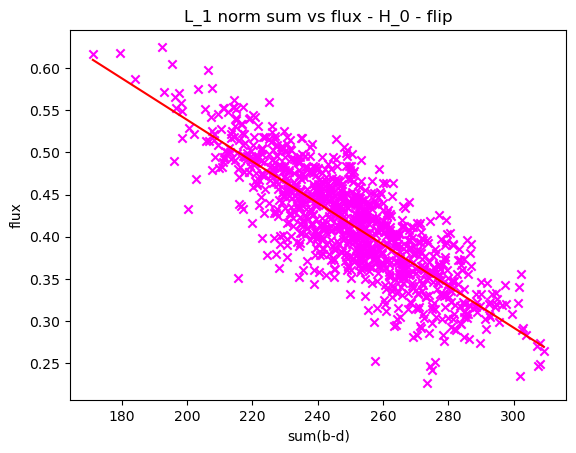

In [184]:
_ = plt.scatter(pers1diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0, ft, 1)
r = [min(pers1diff_sum_0),max(pers1diff_sum_0)]
_ = plt.plot([min(pers1diff_sum_0),max(pers1diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

In [185]:
# sum(p-q) vs flux flip -- test
itest = PtCloudPers1test.shape[0]
pers1diff_sum_0test = np.zeros(itest)
for j in range(itest): 
    C = PtCloudPers1test[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0test[j] = diff_sumC

In [186]:
print(pers1diff_sum_0test)

[244.94112492 227.68549895 226.58771622 281.87005723 281.27112556
 265.6919117  238.73396635 235.14122975 256.62084401 246.51376617
 270.68533909 223.90553927 241.85691202 265.79898953 292.62084401
 270.34219325 199.81432927 224.49789834 224.09683001 242.26455295
 233.9990474  223.03505754 256.97056246 257.92797971 258.94117188
 203.51104355 264.27769816 274.72792184 270.20005786 291.51376617
 241.12803757 229.81432927 277.27112556 249.93459928 246.04163015
 264.62084401 252.97445941 269.62741661 234.91211188 250.96398985
 255.44927108 210.90553927 255.09683001 231.44269848 245.34219325
 258.92797971 281.79898953 258.62741661 252.97932959 260.21982265
 269.97056246 262.57168865 274.37820339 293.55634892 261.33562064
 265.09298003 247.49404836 268.20663047 257.27769816 284.79241693
 247.76297939 241.40454078 241.27112556 217.88539696 206.42683065
 236.26145279 263.2285428  214.87005723 254.6984843  221.85033941
 243.96126723 226.79241693 237.94112492 214.42202806 235.05696988
 239.20663

In [187]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(pers1diff_sum_0.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


nmse =  50.82720060604652
rsq =  0.7458639969697675


In [188]:
# OLS flip space L1 sum H0
import statsmodels.api as sm
pers1diff_sum_0plusc = sm.add_constant(pers1diff_sum_0)
mod = sm.OLS(ft, pers1diff_sum_0plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2166.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.91e-252
Time:                        15:03:00   Log-Likelihood:                 1890.6
No. Observations:                1000   AIC:                            -3777.
Df Residuals:                     998   BIC:                            -3767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0309      0.013     77.686      0.0

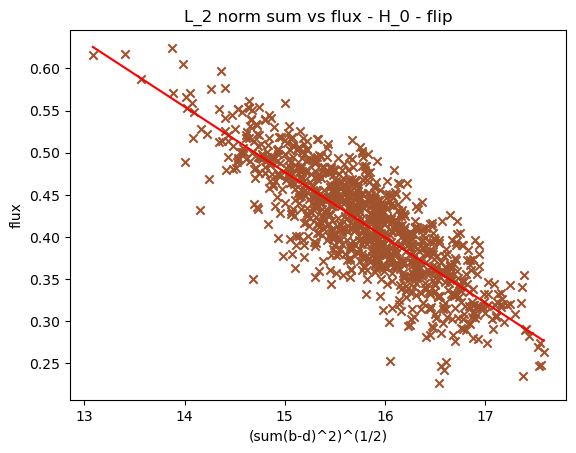

In [189]:
# L2 norm flip H0
pers1diff_sum_0_L2 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_0_L2[x] = diff_sumCL2
_ = plt.scatter(pers1diff_sum_0_L2,ft, marker='x',color='sienna')
_ = plt.title('L_2 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0_L2, ft, 1)
a = min(pers1diff_sum_0_L2)
b = max(pers1diff_sum_0_L2)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [190]:
# L2 norm flip H0 -- test
pers1diff_sum_0_L2test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_0_L2test[x] = diff_sumCL2

In [191]:
ytest = LR().fit(pers1diff_sum_0_L2.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0_L2test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  50.24846920781647
rsq =  0.7487576539609176


In [192]:
# OLS flip space L2 sum H0
import statsmodels.api as sm
pers1diff_sum_0_L2plusc = sm.add_constant(pers1diff_sum_0_L2)
mod = sm.OLS(ft, pers1diff_sum_0_L2plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2170.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.51e-252
Time:                        15:03:35   Log-Likelihood:                 1891.3
No. Observations:                1000   AIC:                            -3779.
Df Residuals:                     998   BIC:                            -3769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6395      0.026     62.342      0.0

1000


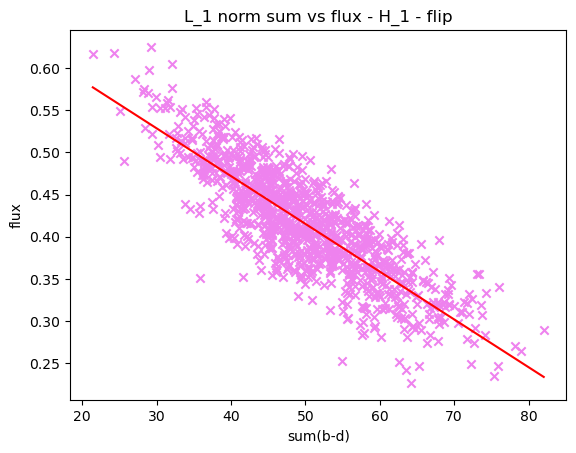

In [193]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers1.shape[0]
print(i)
pers1diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers1[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_1[j] = diff_sumC
_ = plt.scatter(pers1diff_sum_1,ft, marker='x',color='violet')
_ = plt.title('L_1 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1, ft, 1)
r = [min(pers1diff_sum_1),max(pers1diff_sum_1)]
_ = plt.plot([min(pers1diff_sum_1),max(pers1diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

In [194]:
# sum(p-q) vs flux  --test
pers1diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = PtCloudPers1test[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_1test[j] = diff_sumC

In [195]:
# test nmse and rsq flip L1 H1
ytest = LR().fit(pers1diff_sum_1.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  55.02575197061459
rsq =  0.724871240146927


In [196]:
# OLS flip space L1 sum H1
import statsmodels.api as sm
pers1diff_sum_1plusc = sm.add_constant(pers1diff_sum_1)
mod = sm.OLS(ft, pers1diff_sum_1plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2304.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.41e-261
Time:                        15:04:19   Log-Likelihood:                 1912.1
No. Observations:                1000   AIC:                            -3820.
Df Residuals:                     998   BIC:                            -3810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6980      0.006    116.556      0.0

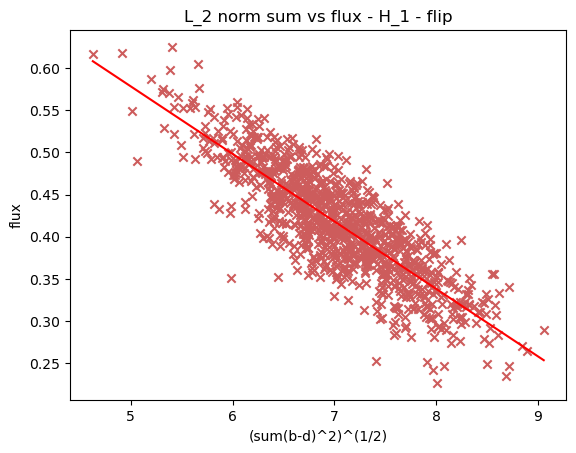

In [197]:
# L2 norm flip H1
pers1diff_sum_1_L2 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_1_L2[x] = diff_sumCL2
_ = plt.scatter(pers1diff_sum_1_L2,ft, marker='x',color='indianred')
_ = plt.title('L_2 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1_L2, ft, 1)
a = min(pers1diff_sum_1_L2)
b = max(pers1diff_sum_1_L2)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [198]:
# L2 norm flip H1 -- test
pers1diff_sum_1_L2test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_1_L2test[x] = diff_sumCL2

In [199]:
# test nmse and rsq flip L2 H1
ytest = LR().fit(pers1diff_sum_1_L2.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1_L2test.reshape(-1,1))
print('results on the training set linear regression, L2 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum, H1, flip method
nmse =  52.52075296798631
rsq =  0.7373962351600685


In [200]:
# OLS flip space L2 sum H1
import statsmodels.api as sm
pers1diff_sum_1_L2plusc = sm.add_constant(pers1diff_sum_1_L2)
mod = sm.OLS(ft, pers1diff_sum_1_L2plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2368.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          9.72e-266
Time:                        15:06:16   Log-Likelihood:                 1921.7
No. Observations:                1000   AIC:                            -3839.
Df Residuals:                     998   BIC:                            -3830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9777      0.012     84.271      0.0

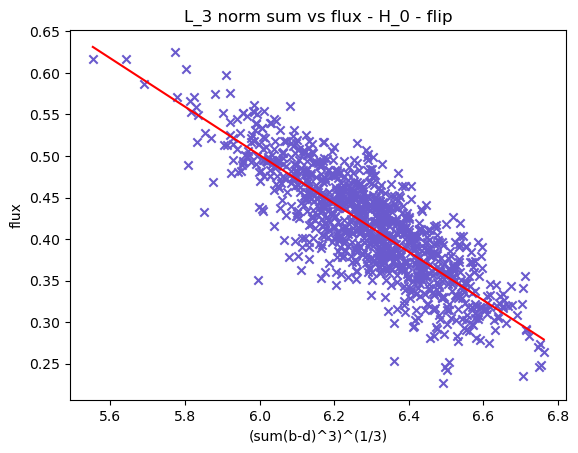

In [201]:
# L3 norm flip H0
pers1diff_sum_0_L3 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_0_L3[x] = diff_sumCroot

# test set
pers1diff_sum_0_L3test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_0_L3test[x] = diff_sumCroot

_ = plt.scatter(pers1diff_sum_0_L3,ft, marker='x',color='slateblue')
_ = plt.title('L_3 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('(sum(b-d)^3)^(1/3)')
_ = plt.ylabel('flux')
#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0_L3, ft, 1)
a = min(pers1diff_sum_0_L3)
b = max(pers1diff_sum_0_L3)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [202]:
# test nmse and rsq flip L3 H0
ytest = LR().fit(pers1diff_sum_0_L3.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0_L3test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  50.122141112060376
rsq =  0.749389294439698


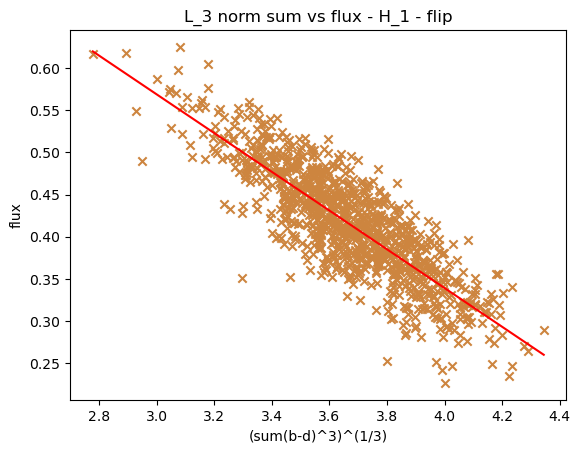

In [203]:
# L3 norm flip H1
pers1diff_sum_1_L3 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_1_L3[x] = diff_sumCroot

# test set
pers1diff_sum_1_L3test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_1_L3test[x] = diff_sumCroot

_ = plt.scatter(pers1diff_sum_1_L3,ft, marker='x',color='peru')
_ = plt.title('L_3 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('(sum(b-d)^3)^(1/3)')
_ = plt.ylabel('flux')
#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1_L3, ft, 1)
a = min(pers1diff_sum_1_L3)
b = max(pers1diff_sum_1_L3)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [204]:
# test nmse and rsq flip L3 H1
ytest = LR().fit(pers1diff_sum_1_L3.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1_L3test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  51.926178521883
rsq =  0.7403691073905849


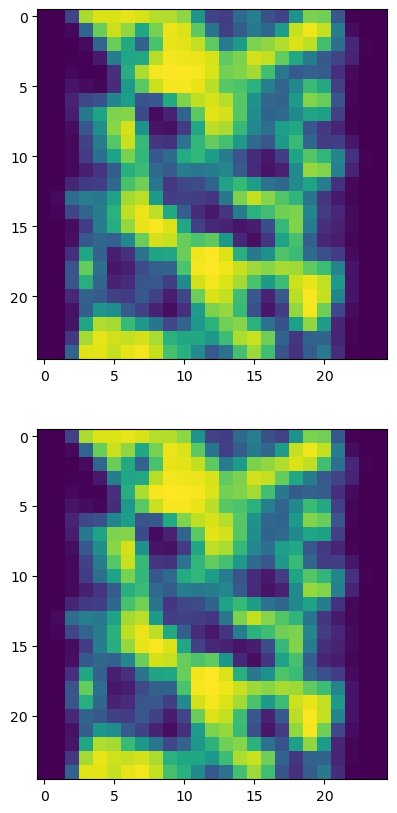

In [205]:
# comparison smaller array to bigger array
inum = 19
train = prt[inum]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,10), gridspec_kw={'height_ratios': [1,1]})
ax1.imshow(train)
train = prtqtr[inum]
ax2.imshow(train)

In [206]:
# test nmse and rsq flip L1 H0 and H1
pers1diff_sum_01 = np.array([pers1diff_sum_0,pers1diff_sum_1]).T
pers1diff_sum_01test = np.array([pers1diff_sum_0test,pers1diff_sum_1test]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L1 sum, H0 and H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H0 and H1, flip method
nmse =  49.429294985588015
rsq =  0.7528535250720598


In [207]:
#statsmodel flip space OLS L1 H0 and H1
import statsmodels.api as sm
pers1diff_sum_01 = np.array([pers1diff_sum_0,pers1diff_sum_1]).T
pers1diff_sum_01plusc = sm.add_constant(pers1diff_sum_01)
mod01 = sm.OLS(ft, pers1diff_sum_01plusc)
res01 = mod01.fit()
print(res01.summary())
print(res01.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1219.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.39e-268
Time:                        15:08:39   Log-Likelihood:                 1932.4
No. Observations:                1000   AIC:                            -3859.
Df Residuals:                     997   BIC:                            -3844.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8452      0.024     35.746      0.0

In [208]:
# test nmse and rsq flip L2 H0 and H1
pers1diff_sum_01_L2 = np.array([pers1diff_sum_0_L2,pers1diff_sum_1_L2]).T
pers1diff_sum_01_L2test = np.array([pers1diff_sum_0_L2test,pers1diff_sum_1_L2test]).T
ytest = LR().fit(pers1diff_sum_01_L2,np.array(ft)).predict(pers1diff_sum_01_L2test)
print('results on the training set linear regression, L2 sum, H0 and H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum, H0 and H1, flip method
nmse =  48.07783174066749
rsq =  0.7596108412966626


In [209]:
#statsmodel flip space OLS L2 H0 and H1
import statsmodels.api as sm
pers1diff_sum_01_L2 = np.array([pers1diff_sum_0_L2,pers1diff_sum_1_L2]).T
pers1diff_sum_01_L2plusc = sm.add_constant(pers1diff_sum_01_L2)
mod01 = sm.OLS(ft, pers1diff_sum_01_L2plusc)
res01 = mod01.fit()
print(res01.summary())
print(res01.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1239.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.64e-271
Time:                        15:09:23   Log-Likelihood:                 1938.1
No. Observations:                1000   AIC:                            -3870.
Df Residuals:                     997   BIC:                            -3856.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2426      0.047     26.255      0.0

In [210]:
# try adding measure -- flip L2 norm and msr
msrtest = np.sum(np.sum(prtest, axis=-1), axis=-1)
msr.shape
pers1diff_sum_0.shape

(1000,)

In [211]:

pers1diff_sum_1_L2_addmsr = np.array([pers1diff_sum_1_L2,msr]).T
pers1diff_sum_1_L2_addmsrtest = np.array([pers1diff_sum_1_L2test,msrtest]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  26.427329859951556
rsq =  0.8678633507002422


In [212]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence()
PtCloudPers2 = VR.fit_transform(xypts2)
VR.plot(PtCloudPers2,0)

1000


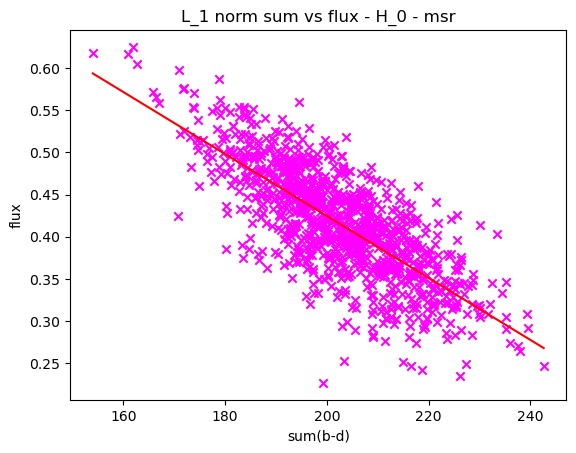

In [213]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers2.shape[0]
print(i)
Pers2_diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers2[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_0[j] = diff_sumC
_ = plt.scatter(Pers2_diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0 - msr')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_0, ft, 1)
r = [min(Pers2_diff_sum_0),max(Pers2_diff_sum_0)]
_ = plt.plot([min(Pers2_diff_sum_0),max(Pers2_diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

1000


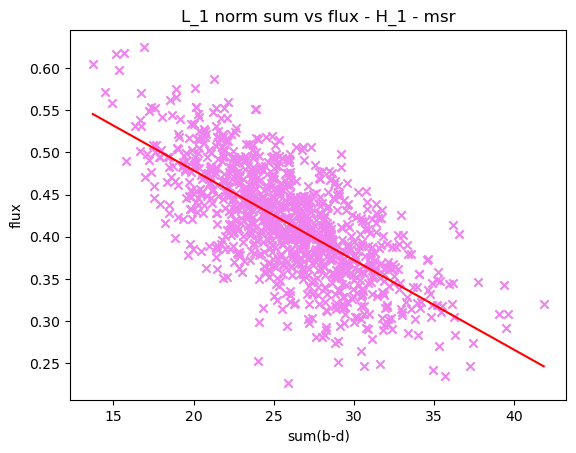

In [214]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers2.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers2[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC
_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='violet')
_ = plt.title('L_1 norm sum vs flux - H_1 - msr')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

In [215]:
#Persistence diagrams flips
from gtda.diagrams import PersistenceLandscape
PLless = PersistenceLandscape(n_layers=10,n_bins=10)
xflip= PLless.fit_transform(PtCloudPers1)

In [216]:
PLless.plot(xflip,340)

In [217]:
#linear regression of all layers flip
a,b,c = xflip.shape
print(a,b,c)
xflipall = np.reshape(xflip,[a,b*c,-1])[:,:,0]
xflipallc = sm.add_constant(xflipall)
flippersmodelall = sm.OLS(ft,xflipallc)
flippersresultsall = flippersmodelall.fit()
print(flippersresultsall.summary())

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     9.940
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.39e-82
Time:                        15:52:59   Log-Likelihood:                 1638.0
No. Observations:                1000   AIC:                            -3106.
Df Residuals:                     915   BIC:                            -2689.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.147e-14   2.17e-12     -0.0

In [218]:
#linear regression first layer flip
PL = PersistenceLandscape(n_layers=2,n_bins=100)
xflipbins = PL.fit_transform(PtCloudPers1)
PL.plot(xflipbins,340)

In [220]:
#linear regression of first layer of H0 and H1 flip

xflipbins01  = np.concatenate((xflipbins[:,0,:],xflipbins[:,2,:]), axis=1)
flippersmodel01 = sm.OLS(ft,xflipbins01)
flippersresults01 = flippersmodel01.fit()
print(flippersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     5.280
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.97e-38
Time:                        15:53:52   Log-Likelihood:                 1509.3
No. Observations:                1000   AIC:                            -2851.
Df Residuals:                     916   BIC:                            -2438.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.313e+08   7.85e+08     -0.931      0.3

In [221]:
#Persistence diagrams from our measure space method
from gtda.diagrams import PersistenceLandscape
xmsr= PLless.fit_transform(PtCloudPers2)

In [222]:
PLless.plot(xmsr,340)

In [223]:
#linear regression of all layers msr
a,b,c = xmsr.shape
print(a,b,c)
xmsrall = np.reshape(xmsr,[a,b*c,-1])[:,:,0]
xmsrallc = sm.add_constant(xmsrall)
msrpersmodelall = sm.OLS(ft,xmsrallc)
msrpersresultsall = msrpersmodelall.fit()
print(msrpersresultsall.summary())

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     11.08
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.09e-85
Time:                        15:54:22   Log-Likelihood:                 1634.5
No. Observations:                1000   AIC:                            -3117.
Df Residuals:                     924   BIC:                            -2744.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.38e-13    8.7e-13      0.7

In [224]:
#linear regression first layer
PL = PersistenceLandscape(n_layers=2,n_bins=100)
xmsrbins = PL.fit_transform(PtCloudPers2)
PL.plot(xmsrbins,340)

In [225]:
#linear regression of first layer of H0 and H1 msr

xmsrbins01  = np.concatenate((xmsrbins[:,0,:],xmsrbins[:,2,:]), axis=1)
msrpersmodel01 = sm.OLS(ft,xmsrbins01)
msrpersresults01 = msrpersmodel01.fit()
print(msrpersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     5.194
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.96e-37
Time:                        15:54:31   Log-Likelihood:                 1504.5
No. Observations:                1000   AIC:                            -2843.
Df Residuals:                     917   BIC:                            -2436.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.575e-12   1.97e-12     -1.310      0.1